## mmdconcrete
Aggregate and anhydrous phase extraction from a concrete section observed by a SEM image.

## Description
This example shows an image analysis technique to detect anhydrous phase and aggregate from a polished concrete section observed by scanning electron microscope (SEM). The anhydrous phase appears as white grains while the aggregate appears in the image as an homogeneous medium-gray grains. This image was kindly provided by Prof. Gladis Camarini from FEC-UNICAMP.

The steps for this analysis are: i) anhydrous detection by automatic threshold analysis; ii) homogeneous grain detection using watershed technique; iii) aggregate are homogeneous grains that are not from the anhydrous phase. The automatic threshold analysis is done using 1D-signal morphological processing using watershed. 

In [3]:
import numpy as np
from PIL import Image
import ia870 as ia

# Reading
The SEM image of a polished concrete section is read. The anhydrous phase are the white pores, while the aggregate are the medium-gray homogeneous pores. 

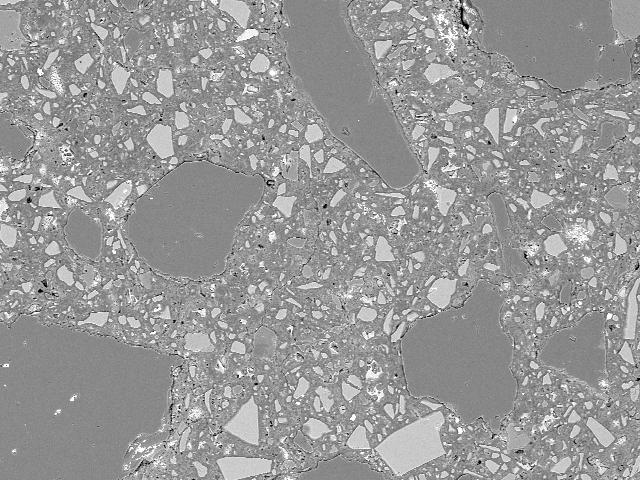

In [4]:
f_pil = Image.open('data/csample.jpg').convert('L')
f_pil

In [5]:
f = np.array (f_pil)

# Histogram
The histogram has a small peak in the white region related to the anhydrous phase.

In [6]:
(h,bin) = np.histogram (f, range(256)) # h1 vertical (255,)
bin = bin[0:-1] # bin vertical (255,)
h = h.reshape(1, 255)# h1 horizontal (1, 255)
bin = bin.reshape(1, 255) # bin horizontal (1, 255)
#Image.fromarray(b.astype(np.uint8)*255)

# Automatic threshold from histogram.

The threshold value is extracted using the watershed technique. The aim is to detect the middle valley of the histogram. If the histogram is negated, we need to extract the middle peak of the 1D signal. This is accomplished by find proper markers on the valleys. These markers are extracted by detecting the regional minima of the filtered signal (alternating sequential filtering, closing followed by opening of length 5 pixels). To discard the detection of peaks near the limits of the histogram, an intersection is done using the mmframe function. For illustrative purpose, a plot of all the signals involved is displayed. 

In [7]:
hf = ia.iaasf(ia.ianeg(h),'co',ia.iaseline(5,0));
ws = ia.iawatershed(hf);
wsf = ws
wsf[0,:20]=False
wsf[0,-20:]=False
t = np.nonzero(wsf) # tuple : 2D Indices
Thr = np.uint8(t[1]) # The threshold value
print(Thr)
#x = 1:size(h,1);
#mmax = mmstats(h,'max');
#ws_plot = mmgray(ws, 'uint16', mmax);
#wsf_plot = mmgray(wsf, 'uint16', mmax);

[187]


# Anhydrous using thresholding and filtering

The threshold value found in the previous step is applied. After, a filter to remove blobs smaller then 20 pixels is applied. For illustrative, the contour of the anhydrous grains are displayed as an overlay on the original image. 

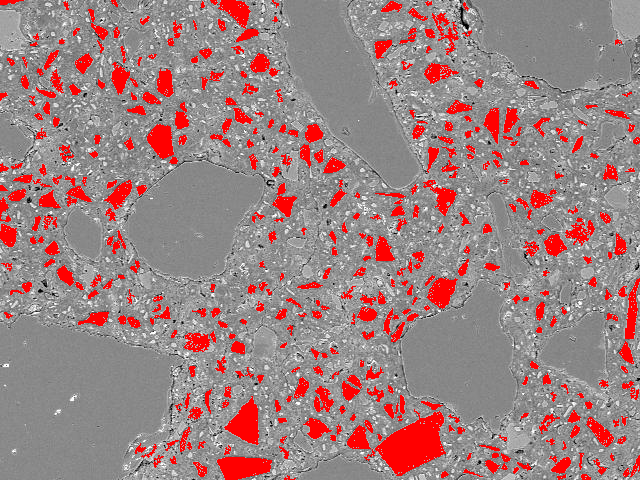

In [8]:
anidro = f > Thr
anidrof = ia.iaareaopen (anidro, 20)
#anidro_phase = sum (double (anidrof(:))) / (w*h);
Image.fromarray(ia.iagshow(f, anidrof).transpose(1, 2, 0))

# Homogeneous regions
The watershed applied on the gradient using the markers from filtered regional minima of the gradient is a standard watershed based technique. In this case the filter was chosen to be a contrast mmhmin . 

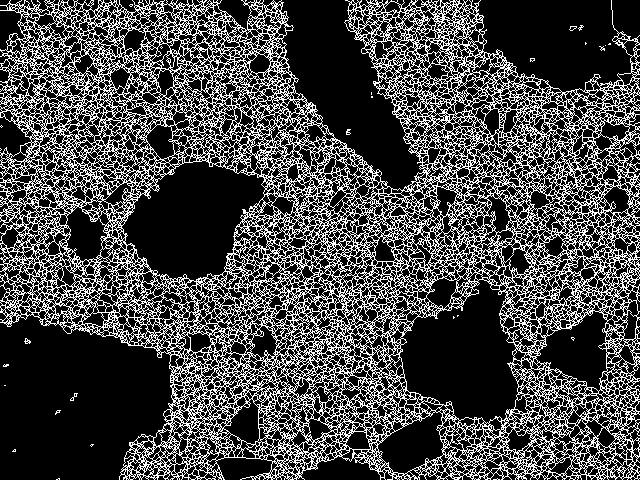

In [9]:
g = ia.iagradm(f);
m = ia.iaregmin(ia.iahmin(g,10));
ws=ia.iacwatershed(g,m);
Image.fromarray(ws.astype(np.uint8)*255)

# Aggregate detection
The result of the watershed in the previous step is the detection of a large number of regions. The larger ones are the aggregate and the anhydrous. So first the regions are filtered out using an area criterion of 300 pixels. Small holes (area <= 50) are closed. The aggregate is obtained by removing the anhydrous phase. 

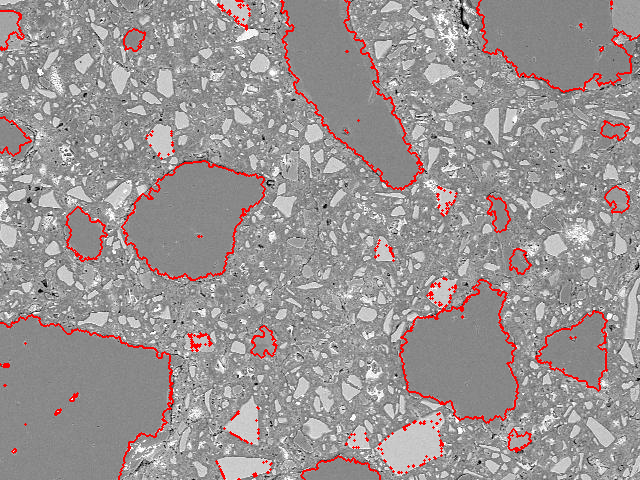

In [10]:
aux1=ia.iaareaopen(ia.ianeg(ws),300);
aux2=ia.iaareaclose(aux1,50);
aggr=ia.iasubm(aux2,anidro);
Image.fromarray(ia.iagshow(f, ia.iagradm(aggr)).transpose(1, 2, 0))

## Measurement and display
Finally each phase is measured and an illustrative display is constructed. The grains contoured by red are the aggregate and those contoured by green, the anhydrous. 

0.16088216145833334
0.2552571614583333


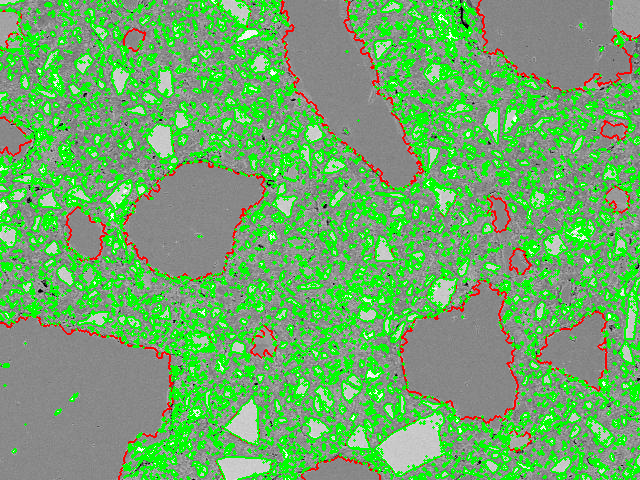

In [11]:
n = f.size
anidro_phase = ia.iastats(anidro,'sum')/n;
print(anidro_phase);
aggr_phase = ia.iastats(aggr,'sum')/n;
print(aggr_phase);
Image.fromarray(ia.iagshow(f, ia.iagradm(aggr), ia.iagradm(anidro)).transpose(1, 2, 0))